In [4]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv("data/togo-dapaong_qc.csv")
#df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

In [6]:
# Summary statistics for numeric columns
summary_stats = df.describe()
print(summary_stats)

# Missing value report
missing_values = df.isna().sum()
print(missing_values[missing_values > 0])


# List columns with >5% nulls
threshold = 0.05 * len(df)
high_nulls = missing_values[missing_values > threshold]
print("Columns with >5% nulls:", high_nulls.index.tolist())

                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      230.555040     151.258469     116.444352     226.144375   
std       322.532347     250.956962     156.520714     317.346938   
min       -12.700000       0.000000       0.000000       0.000000   
25%        -2.200000       0.000000       0.000000       0.000000   
50%         2.100000       0.000000       2.500000       4.400000   
75%       442.400000     246.400000     215.700000     422.525000   
max      1424.000000    1004.500000     805.700000    1380.000000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      219.568588      27.751788      55.013160       2.368093   
std       307.932510       4.758023      28.778732       1.462668   
min         0.000000      14.900000       3.300000       0.000000   
25%         0.000000      24.2000

In [7]:
# Check for outliers and missing values in key columns
key_columns = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
outlier_flags = {}

# Compute Z-scores and flag outliers
for col in key_columns:
    z_scores = stats.zscore(df[col].dropna())
    outlier_flags[col] = abs(z_scores) > 3
    df[col + '_outlier'] = outlier_flags[col]

# Drop or impute missing values in key columns
df[key_columns] = df[key_columns].fillna(df[key_columns].median())

# Export cleaned DataFrame
df.to_csv('data/<country>_clean.csv', index=False)

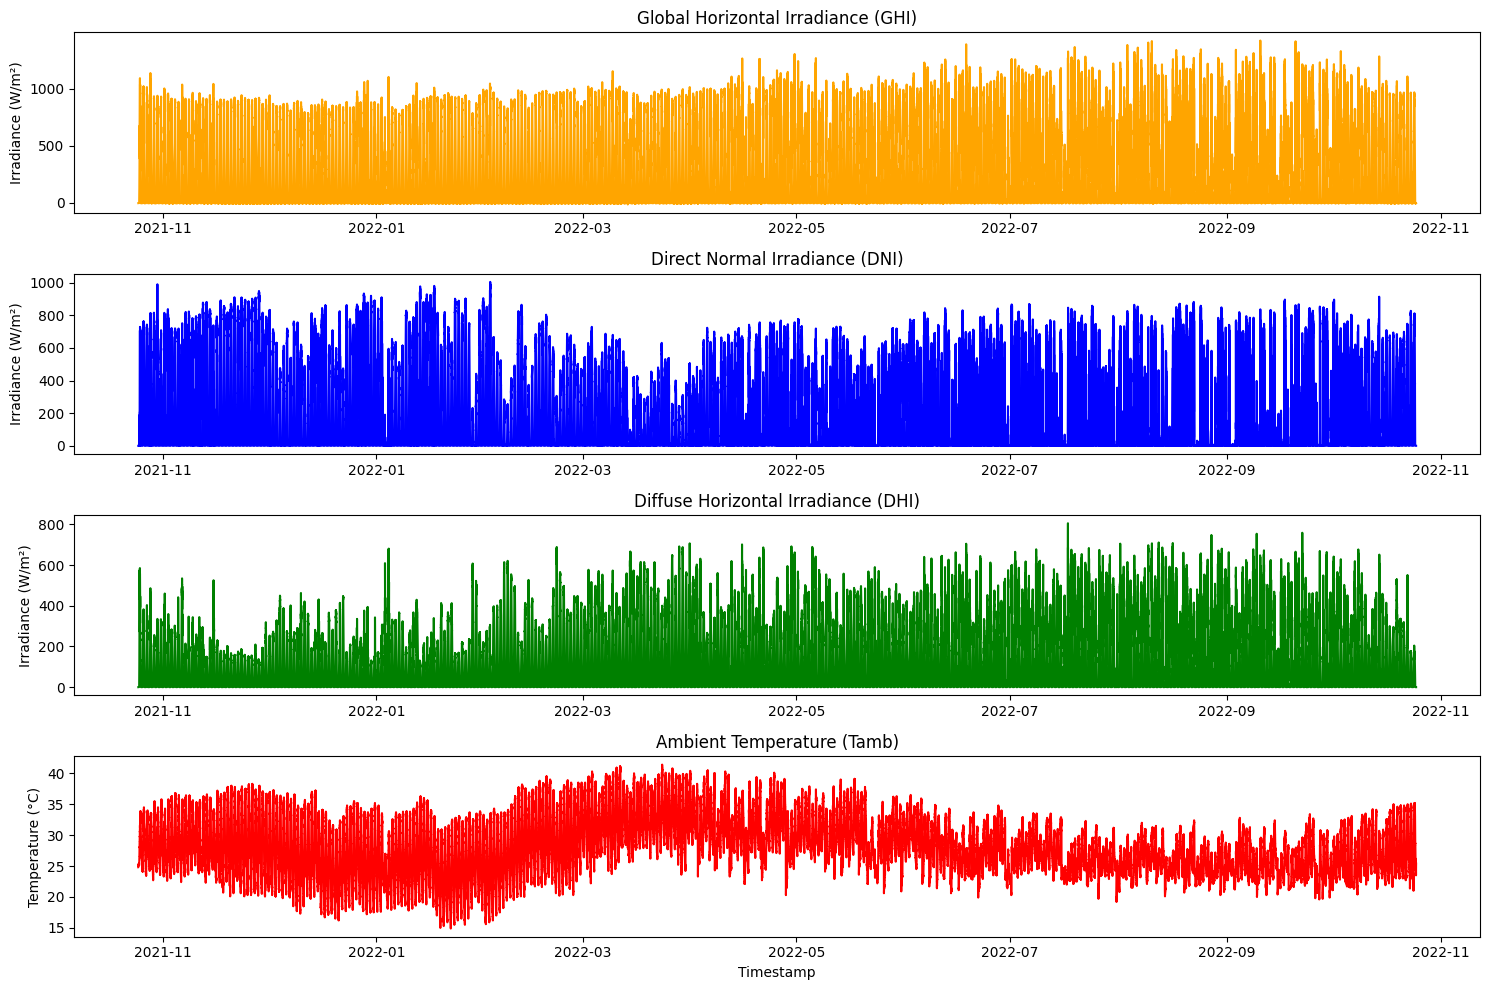

In [8]:
# Ensure timestamp is in datetime format
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Plot GHI, DNI, DHI, and Tamb
plt.figure(figsize=(15, 10))
plt.subplot(4, 1, 1)
plt.plot(df['Timestamp'], df['GHI'], label='GHI', color='orange')
plt.title('Global Horizontal Irradiance (GHI)')
plt.ylabel('Irradiance (W/m²)')

plt.subplot(4, 1, 2)
plt.plot(df['Timestamp'], df['DNI'], label='DNI', color='blue')
plt.title('Direct Normal Irradiance (DNI)')
plt.ylabel('Irradiance (W/m²)')

plt.subplot(4, 1, 3)
plt.plot(df['Timestamp'], df['DHI'], label='DHI', color='green')
plt.title('Diffuse Horizontal Irradiance (DHI)')
plt.ylabel('Irradiance (W/m²)')

plt.subplot(4, 1, 4)
plt.plot(df['Timestamp'], df['Tamb'], label='Tamb', color='red')
plt.title('Ambient Temperature (Tamb)')
plt.ylabel('Temperature (°C)')
plt.xlabel('Timestamp')

plt.tight_layout()
plt.show()

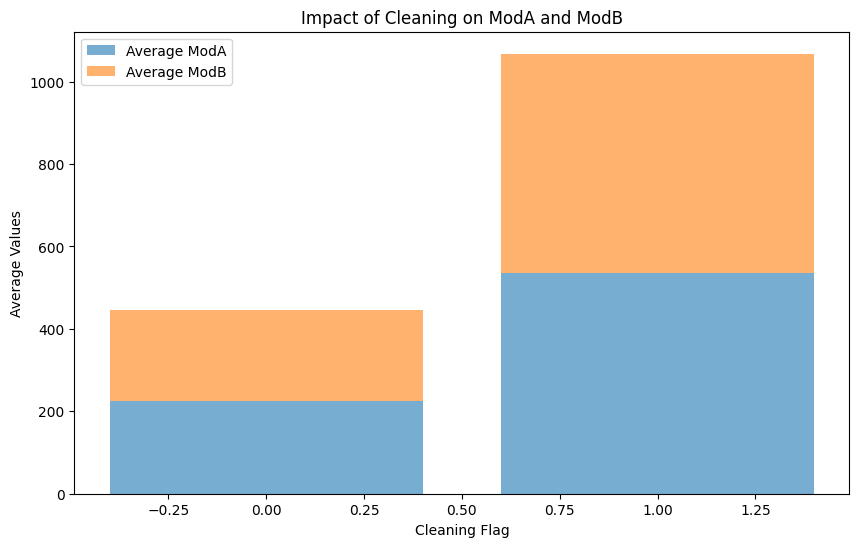

In [12]:
# Assuming you have a cleaning flag column
cleaning_impact = df.groupby('Cleaning')[['ModA', 'ModB']].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(cleaning_impact['Cleaning'], cleaning_impact['ModA'], alpha=0.6, label='Average ModA')
plt.bar(cleaning_impact['Cleaning'], cleaning_impact['ModB'], alpha=0.6, label='Average ModB', bottom=cleaning_impact['ModA'])
plt.title('Impact of Cleaning on ModA and ModB')
plt.xlabel('Cleaning Flag')
plt.ylabel('Average Values')
plt.legend()
plt.show()

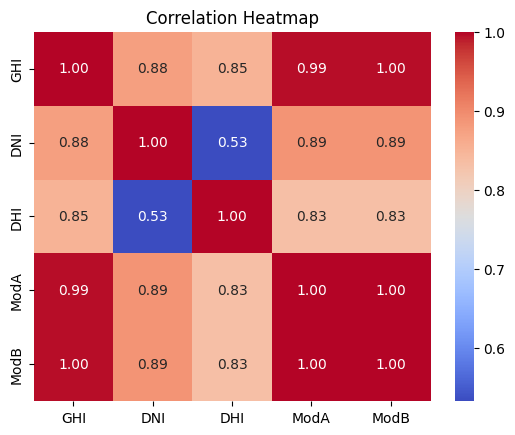

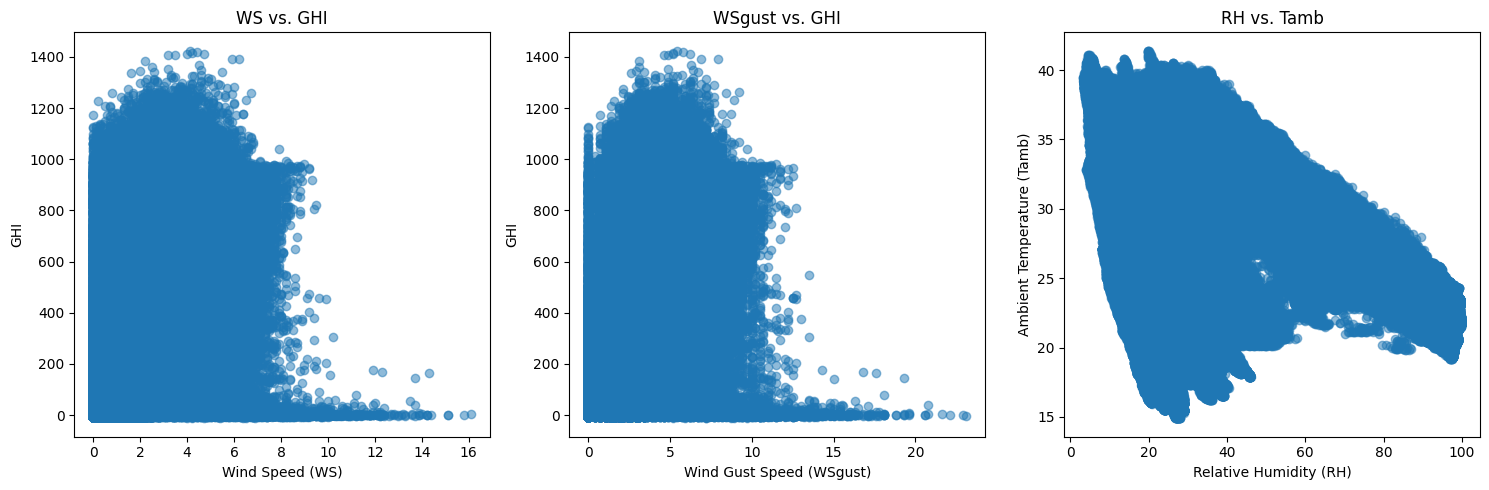

In [13]:
# Heatmap of correlations
correlation_matrix = df[['GHI', 'DNI', 'DHI', 'ModA', 'ModB']].corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Scatter plots
plt.figure(figsize=(15, 5))

# WS vs. GHI
plt.subplot(1, 3, 1)
plt.scatter(df['WS'], df['GHI'], alpha=0.5)
plt.title('WS vs. GHI')
plt.xlabel('Wind Speed (WS)')
plt.ylabel('GHI')

# WSgust vs. GHI
plt.subplot(1, 3, 2)
plt.scatter(df['WSgust'], df['GHI'], alpha=0.5)
plt.title('WSgust vs. GHI')
plt.xlabel('Wind Gust Speed (WSgust)')
plt.ylabel('GHI')

# RH vs. Tamb
plt.subplot(1, 3, 3)
plt.scatter(df['RH'], df['Tamb'], alpha=0.5)
plt.title('RH vs. Tamb')
plt.xlabel('Relative Humidity (RH)')
plt.ylabel('Ambient Temperature (Tamb)')

plt.tight_layout()
plt.show()

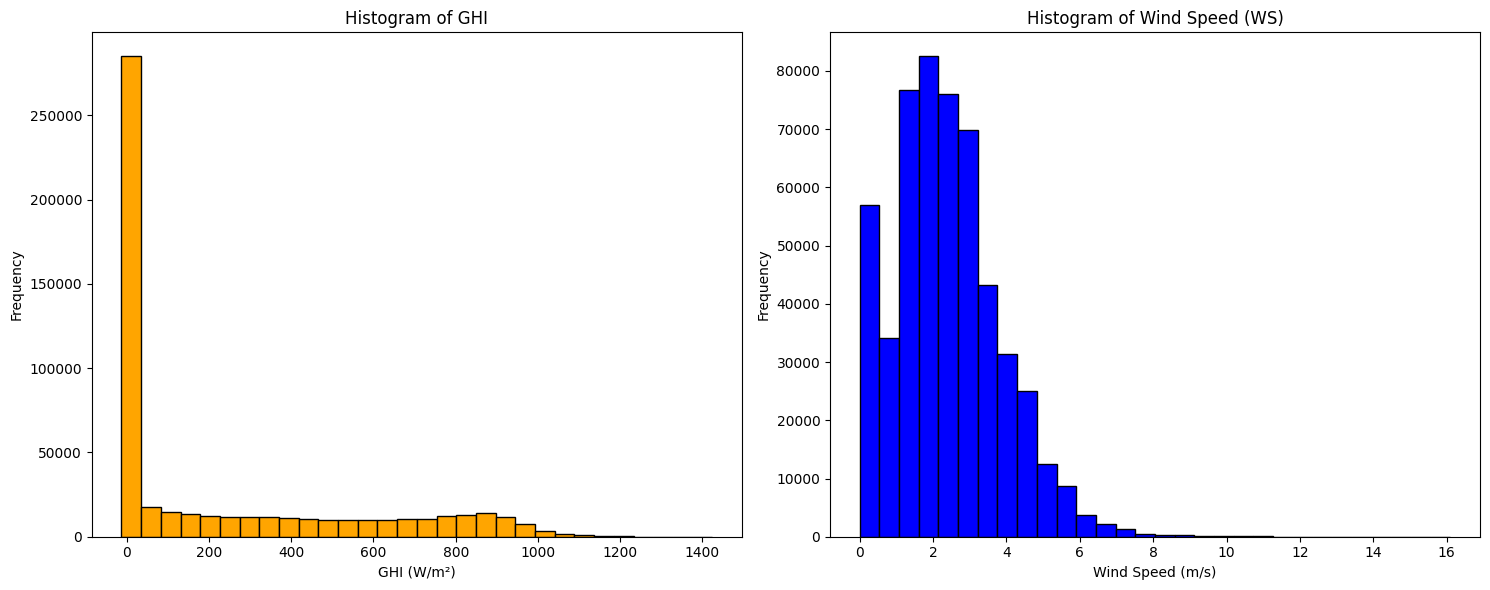

In [14]:
# Histograms for GHI and WS
plt.figure(figsize=(15, 6))

# Histogram for GHI
plt.subplot(1, 2, 1)
plt.hist(df['GHI'], bins=30, color='orange', edgecolor='black')
plt.title('Histogram of GHI')
plt.xlabel('GHI (W/m²)')
plt.ylabel('Frequency')

# Histogram for WS
plt.subplot(1, 2, 2)
plt.hist(df['WS'], bins=30, color='blue', edgecolor='black')
plt.title('Histogram of Wind Speed (WS)')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

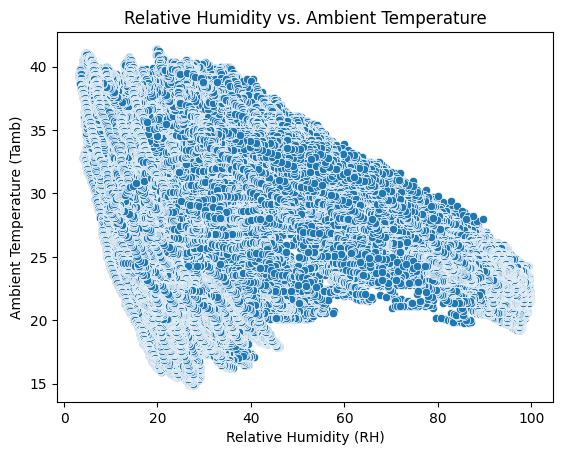

In [15]:
# Examine how RH influences temperature
sns.scatterplot(data=df, x='RH', y='Tamb')
plt.title('Relative Humidity vs. Ambient Temperature')
plt.xlabel('Relative Humidity (RH)')
plt.ylabel('Ambient Temperature (Tamb)')
plt.show()

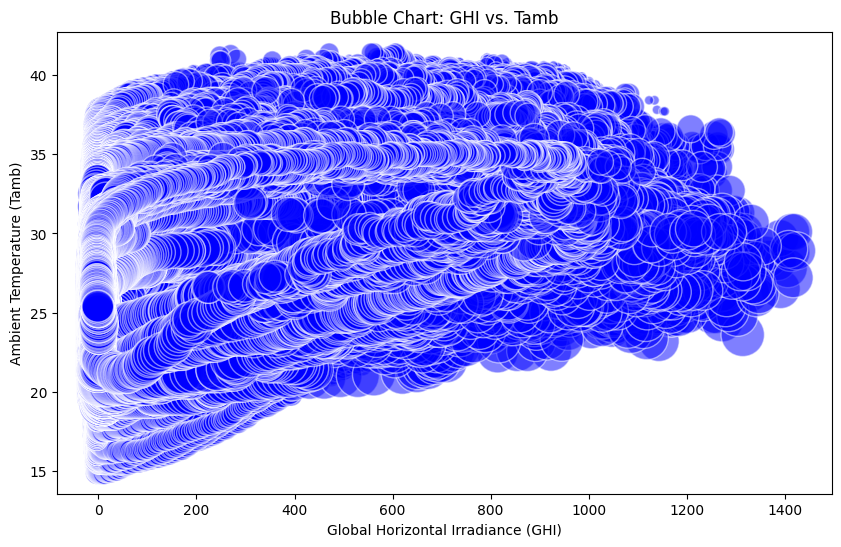

In [16]:
# Bubble chart: GHI vs. Tamb with bubble size = RH
plt.figure(figsize=(10, 6))
plt.scatter(df['GHI'], df['Tamb'], s=df['RH']*10, alpha=0.5, c='blue', edgecolors='w')
plt.title('Bubble Chart: GHI vs. Tamb')
plt.xlabel('Global Horizontal Irradiance (GHI)')
plt.ylabel('Ambient Temperature (Tamb)')
plt.show()